In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
img_dir= "C:\\Users\\DIBYOJIT\\Downloads\\archive (7)\\natural_images"

In [4]:
data= tf.keras.preprocessing.image_dataset_from_directory(img_dir,
                                                         shuffle= True,
                                                         image_size= (256,256),
                                                         batch_size= 32)

Found 6899 files belonging to 8 classes.


In [5]:
class_names= data.class_names
class_names

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [6]:
for img_batch, label_batch in data.take(2):
    print(img_batch.shape)
    print(label_batch.numpy())
    print(label_batch.shape)

(32, 256, 256, 3)
[5 2 6 5 7 6 2 5 2 7 3 4 3 7 6 6 3 6 0 5 4 4 0 4 6 4 5 7 1 1 6 3]
(32,)
(32, 256, 256, 3)
[1 2 5 0 7 7 2 6 6 7 0 7 0 0 5 4 0 7 2 2 2 5 1 7 5 7 3 4 5 5 5 7]
(32,)


In [7]:
plt.style.use('dark_background')

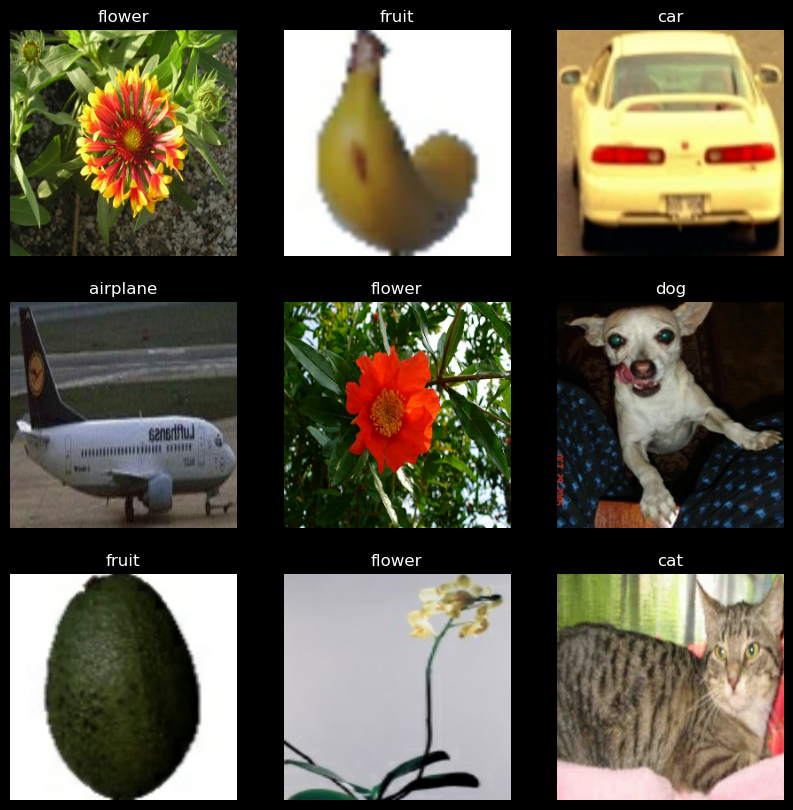

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
train_size= 0.8
len(data)*train_size

172.8

In [10]:
test_size= 0.1
len(data)*test_size

21.6

In [12]:
def get_dataset_partition(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size= len(ds)
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=123)
    train_size= int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    train_ds= ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds= get_dataset_partition(data)

In [14]:
len(train_ds)

172

In [15]:
len(val_ds)

21

In [16]:
len(test_ds)

23

In [17]:
resize_and_rescale=  tf.keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(256,256),
    keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
data_augmentation= tf.keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

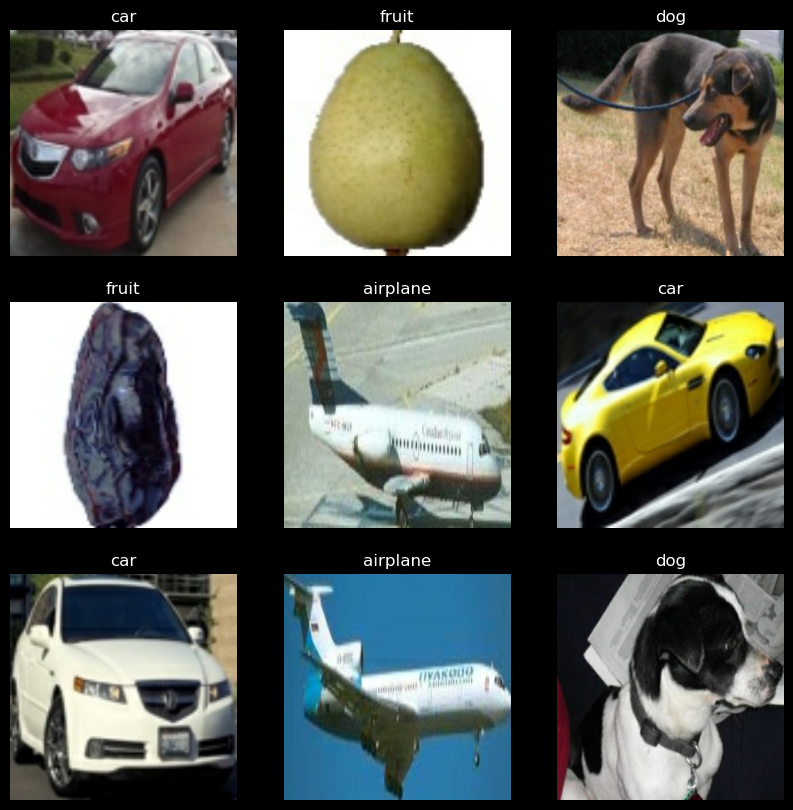

In [19]:
plt.figure(figsize=(10, 10))
for images, labels  in train_ds.take(4):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [20]:
input_shape= (32, 256,256, 3)
cnn= keras.models.Sequential([
    resize_and_rescale,
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape= input_shape),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(8, activation='softmax'),
])
cnn.build(input_shape= input_shape)

In [21]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [22]:
cnn.compile(optimizer='adam',
           loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

In [23]:
history= cnn.fit(train_ds, epochs=10, batch_size= 32, verbose=1, validation_data= val_ds)

Epoch 1/10
172/172 [==============================] - 395s 2s/step - loss: 0.7880 - accuracy: 0.7073 - val_loss: 0.2883 - val_accuracy: 0.8929
Epoch 2/10
172/172 [==============================] - 367s 2s/step - loss: 0.3069 - accuracy: 0.8805 - val_loss: 0.1729 - val_accuracy: 0.9345
Epoch 3/10
172/172 [==============================] - 374s 2s/step - loss: 0.1917 - accuracy: 0.9297 - val_loss: 0.1227 - val_accuracy: 0.9545
Epoch 4/10
172/172 [==============================] - 1066s 6s/step - loss: 0.1514 - accuracy: 0.9477 - val_loss: 0.0965 - val_accuracy: 0.9732
Epoch 5/10
172/172 [==============================] - 364s 2s/step - loss: 0.1108 - accuracy: 0.9599 - val_loss: 0.0721 - val_accuracy: 0.9747
Epoch 6/10
172/172 [==============================] - 359s 2s/step - loss: 0.0663 - accuracy: 0.9772 - val_loss: 0.1390 - val_accuracy: 0.9545
Epoch 7/10
172/172 [==============================] - 358s 2s/step - loss: 0.0813 - accuracy: 0.9718 - val_loss: 0.0622 - val_accuracy: 0.976

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
history.history['accuracy']

[0.7073392868041992,
 0.8805317878723145,
 0.9297031760215759,
 0.9477326273918152,
 0.959934413433075,
 0.9772354960441589,
 0.9717720150947571,
 0.9808778166770935,
 0.9881624579429626,
 0.987251877784729]

In [26]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

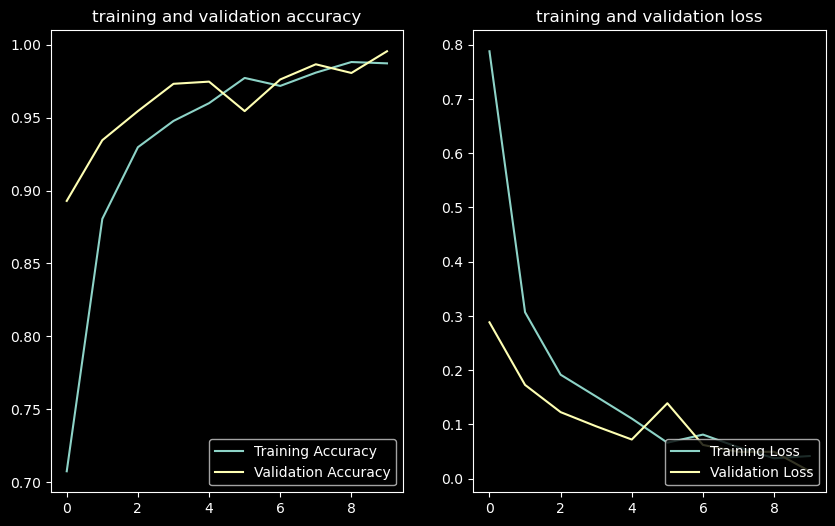

In [28]:
epochs= 10
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label= "Training Accuracy")
plt.plot(range(epochs), val_acc, label= "Validation Accuracy")
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label= "Training Loss")
plt.plot(range(epochs), val_loss, label= "Validation Loss")
plt.legend(loc="lower right")
plt.title("training and validation loss")

first image to predict
first's image actual label: person
1/1 [==============================] - 1s 1s/step
[2.4042656e-14 1.5136566e-03 2.2657930e-05 1.1489266e-04 8.5111096e-10
 1.1691579e-05 1.8965590e-06 9.9833530e-01]
7
predicted label : person


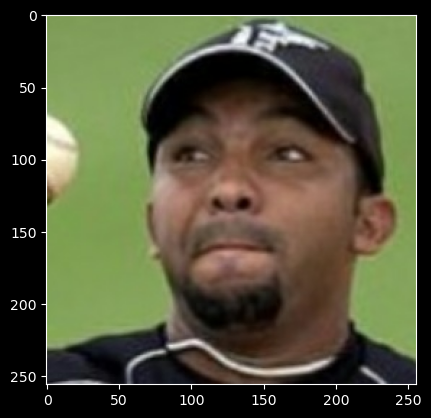

In [29]:
for image_batch, label_batch in test_ds.take(1):
    first_image= image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first's image actual label:", class_names[first_label])
    batch_prediction= cnn.predict(image_batch)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print("predicted label :", class_names[np.argmax(batch_prediction[0])])